## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 2. Dataset

In [2]:
df=pd.read_csv('LaLiga_players_stats_2017.csv')
df=df[['Team','Name','Position', 'Goals scored', 'Interceptions', 'Recoveries', 'Shots', 'Assists', 'Corners', 'Passes']]

## 3. Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Team,Name,Position,Goals scored,Interceptions,Recoveries,Shots,Assists,Corners,Passes
0,Athletic Club,Hodei Oleaga,Goalkeeper,0,0,0,0,0,0,0.0
1,Athletic Club,A. Remiro,Goalkeeper,0,0,0,0,0,0,0.0
2,Athletic Club,Herrerín,Goalkeeper,0,0,228,0,1,0,887.0
3,Athletic Club,Unai Simón,Goalkeeper,0,1,54,0,0,0,155.0
4,Athletic Club,Núñez,Defender,0,28,50,9,0,0,536.0


In [4]:
df.shape

(556, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           556 non-null    object 
 1   Name           556 non-null    object 
 2   Position       556 non-null    object 
 3   Goals scored   556 non-null    int64  
 4   Interceptions  556 non-null    int64  
 5   Recoveries     556 non-null    int64  
 6   Shots          556 non-null    int64  
 7   Assists        556 non-null    int64  
 8   Corners        556 non-null    int64  
 9   Passes         556 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 43.6+ KB


In [6]:
df.describe()

,Goals scored,Interceptions,Recoveries,Shots,Assists,Corners,Passes
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,1.696043,14.643885,80.672662,12.535971,1.142086,6.485612,374.933928
std,3.503828,16.149052,73.931651,17.337159,1.913336,19.998328,429.315303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,1.665500
50%,0.000000,8.000000,67.000000,6.000000,0.000000,0.000000,221.000000
75%,2.000000,24.000000,126.250000,17.250000,2.000000,1.000000,686.000000
max,36.000000,74.000000,366.000000,140.000000,13.000000,170.000000,2535.000000


In [7]:
df.Team.unique()

array(['Athletic Club', 'Atlético de Madrid', 'CD Leganés', 'D. Alavés',
       'FC Barcelona', 'Getafe CF', 'Girona FC', 'Levante UD',
       'R. Valladolid CF', 'Rayo Vallecano', 'RC Celta', 'RCD Espanyol',
       'Real Betis', 'Real Madrid', 'Real Sociedad', 'SD Eibar',
       'SD Huesca', 'Sevilla FC', 'Valencia CF', 'Villarreal CF'],
      dtype=object)

### 3.1 Correlation Matrix

<AxesSubplot:>

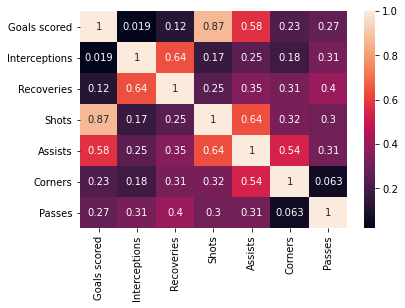

In [8]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)

### 3.2 Detecting outliers

<AxesSubplot:xlabel='Corners', ylabel='Position'>

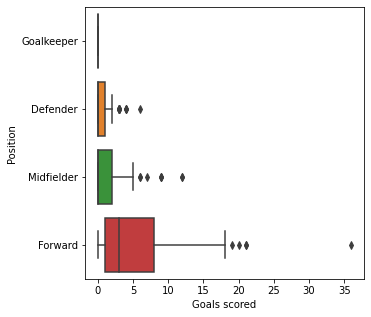

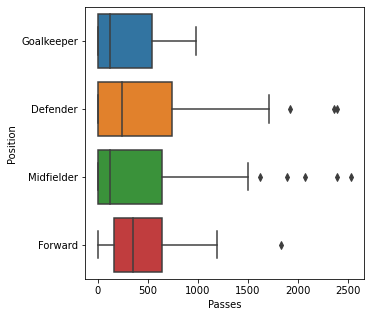

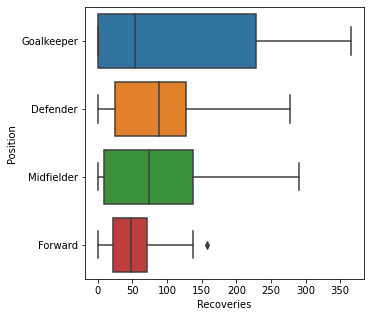

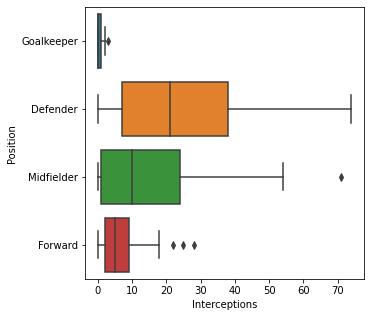

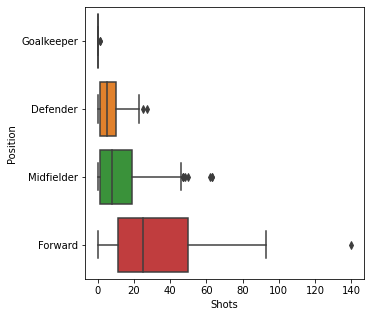

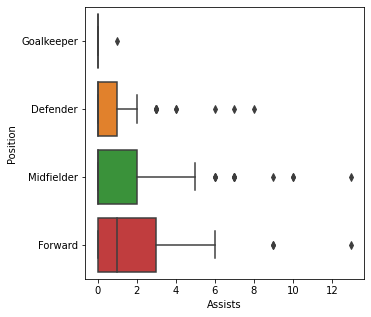

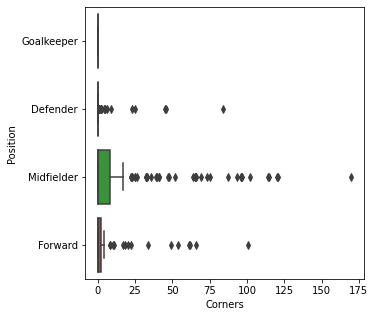

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Goals scored', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Passes', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Recoveries', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Interceptions', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Shots', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Assists', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Corners', y='Position')

### 3.3 Histograms

<AxesSubplot:xlabel='Corners'>

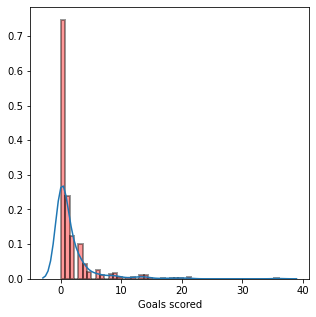

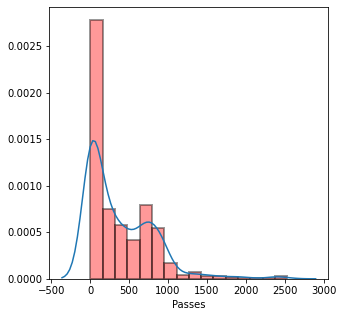

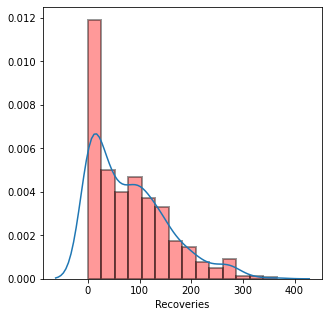

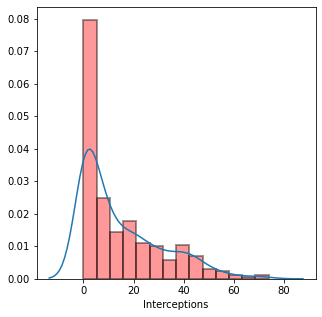

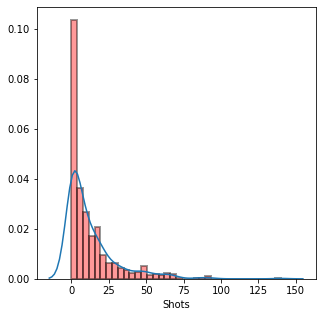

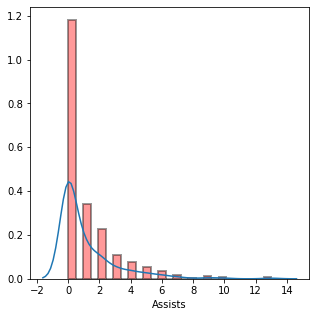

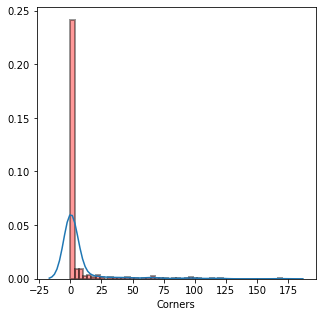

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(df['Goals scored'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Passes'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Recoveries'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Interceptions'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Shots'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Assists'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(5,5))
sns.distplot(df['Corners'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)

## 4. Statistical Testing: Linear Regression

In [11]:
datax = df[['Shots']]
x_train = np.array(datax)
y_train = df['Goals scored'].values
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.1764928]
Independent term: 
 -0.5164655505931743
Mean squared error: 2.91
Variance score: 0.76


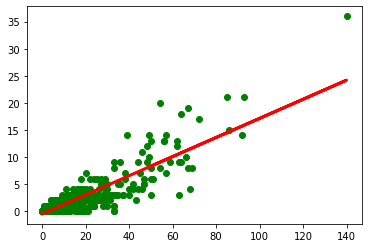

In [12]:
plt.scatter(x_train, y_train,  color='green')
plt.plot(x_train, y_pred, color='red', linewidth=3)

## 5. Conclusion

The model should be improved, even MSE is higher than 1, Variance score is near to 1